# 建模步骤：准备数据 -> 搭建模型 -> 迭代训练 -> 使用模型

## 使用Tensorflow搭建模型：定义TensorFlow输入节点 -> 定义‘学习参数’的变量 -> 定义‘运算’ -> 定义优化目标，选择优化函数

# 1、导入相关的函数库

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
from matplotlib import pylab
%matplotlib inline

# 2、【准备数据】MNSIT手写数字数据可直接导入使用

In [4]:
mnist = input_data.read_data_sets('MNIST_data',one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


## 还原为图片看效果

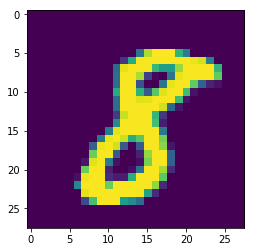

In [5]:
test_image_pix = mnist.train.images[199]
test_image = test_image_pix.reshape((28,-1))
# print(type(test_image_pix))
pylab.imshow(test_image)
pylab.show()


# 3、【搭建模型】使用TensorFlow搭建只有一个隐藏层的全连接神经网络

## 1)、【TensorFlow搭建模型】定义模型的输入节点

In [17]:
tf.reset_default_graph()
input_x = tf.placeholder(tf.float32,[None,784])     # MNIST 中的数据为浮点数，dtypes选择tf.float32，图片为28*28黑白图片，shape设置为[None,784]
input_y = tf.placeholder(tf.float32,[None,10])      # MNIST 中的数字为 0~9，共10类，shape设置为[None,10]

## 2)、【TensorFlow搭建模型】定义模型的学习参数

In [18]:
# weights = tf.Variable(tf.truncated_normal([784,10]))        # 输入为 28*28=784维，输出为10维
# biases = tf.Variable(tf.zeros([10]))

weights = tf.get_variable('weights',[784,10],initializer=tf.truncated_normal_initializer(stddev=0.1))
biases = tf.get_variable('biases',[10],initializer=tf.zeros_initializer)

## 3)、【TensorFlow搭建模型】定义运算

In [19]:
logits = tf.matmul(input_x,weights)+biases
scores = tf.nn.softmax(logits)

## 4)、【TensorFlow搭建模型】定义优化目标（损失/代价函数）和优化函数

In [20]:
# 优化目标
cross_entropy = - tf.reduce_sum(input_y*tf.log(tf.clip_by_value(scores,1e-40,1.0)),1)
loss = tf.reduce_mean(cross_entropy)
# 优化函数
learning_rate = 0.01
global_step = tf.Variable(1,trainable=False)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss,global_step=global_step)
# 计算精度
correct_predictions = tf.equal(tf.argmax(scores,1),tf.argmax(input_y,1))
acc = tf.reduce_mean(tf.cast(correct_predictions,tf.float32))

In [21]:
batch_size = 700
training_epoches = 2000
display_step = 500

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epoches):
        train_x,train_y = mnist.train.next_batch(batch_size)
        _, training_loss = sess.run([optimizer, loss],feed_dict = {input_x:train_x,input_y:train_y})

        if (epoch+1) % display_step == 0:
            test_x,test_y = mnist.test.images,mnist.test.labels
            accuracy = sess.run(acc,feed_dict={input_x:test_x,input_y:test_y})   # 基于测试集对训练好的模型进行测试
            
            print("After {} epochs, loss on train set is {}, accuracy on test set is {}".format(epoch+1,training_loss,accuracy))
            print('After {} epochs, weights is {}, biases is {}'.format(epoch+1,sess.run(weights),sess.run(biases)))
    

After 500 epochs, loss on train set is 0.8764608502388, accuracy on test set is 0.7997999787330627
After 500 epochs, weights is [[-0.01775566 -0.00197766 -0.16979198 ...  0.034923   -0.06677323
  -0.16610333]
 [-0.03985436  0.10575632  0.01696199 ...  0.19475769 -0.03614642
   0.19685297]
 [-0.10230228 -0.09833834 -0.11050916 ... -0.19428661 -0.03511254
   0.03356445]
 ...
 [-0.12125579 -0.03581312 -0.13924904 ...  0.07305101  0.08168184
  -0.01614465]
 [ 0.02017206  0.0363276  -0.07292802 ...  0.03455479 -0.02865704
  -0.10155971]
 [ 0.04011867  0.16024621  0.16392499 ... -0.0137442   0.08177358
  -0.07085615]], biases is [-0.0492754   0.09046391 -0.02064894 -0.01435736  0.03521331  0.0028956
 -0.00395176  0.03854409 -0.05095929 -0.02792406]
After 1000 epochs, loss on train set is 0.6323551535606384, accuracy on test set is 0.8475000262260437
After 1000 epochs, weights is [[-0.01775566 -0.00197766 -0.16979198 ...  0.034923   -0.06677323
  -0.16610333]
 [-0.03985436  0.10575632  0.0169

# 4、【迭代训练】初始化所有变量，迭代训练模型更新参数，并将模型保存至本地

In [11]:
batch_size = 700
training_epoches = 2000
display_step = 500

savedir = 'model/'
saver = tf.train.Saver(max_to_keep=3)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epoches):
        train_x,train_y = mnist.train.next_batch(batch_size)
#         _,step,training_loss = sess.run([optimizer,global_step,loss],feed_dict = {input_x:train_x,input_y:train_y})
        _, training_loss = sess.run([optimizer, loss],feed_dict = {input_x:train_x,input_y:train_y})

        if (epoch+1) % display_step == 0:
            test_x,test_y = mnist.test.images,mnist.test.labels
            accuracy = sess.run(acc,feed_dict={input_x:test_x,input_y:test_y})   # 基于测试集对训练好的模型进行测试
            
            save_path = saver.save(sess,savedir+'fc_model.ckpt',global_step=global_step)
            print('Model saved in file {}'.format(save_path))
            print("After {} epochs, loss on train set is {}, accuracy on test set is {}".format(epoch+1,training_loss,accuracy))
    

Model saved in file model/fc_model.ckpt-501
After 500 epochs, loss on train set is 4.37325382232666, accuracy on test set is 0.2957000136375427
Model saved in file model/fc_model.ckpt-1001
After 1000 epochs, loss on train set is 2.969087600708008, accuracy on test set is 0.47940000891685486
Model saved in file model/fc_model.ckpt-1501
After 1500 epochs, loss on train set is 2.806359052658081, accuracy on test set is 0.5738999843597412
Model saved in file model/fc_model.ckpt-2001
After 2000 epochs, loss on train set is 1.8846756219863892, accuracy on test set is 0.6308000087738037


# 5、【使用模型】基于验证集使用模型进行使用

In [12]:
# 加载训练好的模型（需要重复使用 1-3 步）
saver_test_or_pred = tf.train.Saver()
savedir = 'model/'
ckpt_test_or_pred = tf.train.latest_checkpoint(savedir)
print('saved model is ',ckpt_test_or_pred)

with tf.Session() as sess_1:
    saver_test_or_pred.restore(sess_1,ckpt_test_or_pred)
    
    valid_x,valid_y = mnist.validation.images,mnist.validation.labels
    valid_acc = sess_1.run(acc,feed_dict={input_x:valid_x,input_y:valid_y})   # 基于测试集对训练好的模型进行测试
 
    print("Accuracy on validation set is {}".format(valid_acc)) 

saved model is  model/fc_model.ckpt-90000
INFO:tensorflow:Restoring parameters from model/fc_model.ckpt-90000
Accuracy on validation set is 0.8949999809265137


# 6、【模型再训练】基于已经训练好的模型再次训练

In [13]:
batch_size = 600
training_epochs = 3000
display_step = 1000

saver_2 = tf.train.Saver(max_to_keep=3)
savedir = 'model/'
ckpt_retrain = tf.train.latest_checkpoint(savedir)

with tf.Session() as sess_2:
    saver_2.restore(sess_2,ckpt_retrain)
    for epoch in range(training_epochs):
        train_x,train_y = mnist.train.next_batch(batch_size)
        _,training_loss = sess_2.run([optimizer,loss],feed_dict = {input_x:train_x,input_y:train_y})
        
        if (epoch+1) % display_step == 0:
            test_x,test_y = mnist.test.images,mnist.test.labels
            accuracy = sess_2.run(acc,feed_dict={input_x:test_x,input_y:test_y})   # 基于测试集对训练好的模型进行测试
            
            save_path = saver_2.save(sess_2,savedir+'fc_model.ckpt',global_step=global_step)
#             print('Model saved in file {}'.format(save_path))
            print("After {} epochs, loss on train set is {}, accuracy on test set is {}".format(epoch+1,training_loss,accuracy))
    

INFO:tensorflow:Restoring parameters from model/fc_model.ckpt-90000
After 1000 epochs, loss on train set is 0.39058589935302734, accuracy on test set is 0.8974000215530396
After 2000 epochs, loss on train set is 0.40507203340530396, accuracy on test set is 0.8978999853134155
After 3000 epochs, loss on train set is 0.4329923391342163, accuracy on test set is 0.8978999853134155
